# Simple DFT based seizure anticipation classifier

In [9]:
import numpy as np
import pandas as pd
import scipy.io
import os
import mne
import ieeg_funcs as ief
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Import Clinical Szr Onset Times
sub='NA'
onset_csv_dir='/Users/davidgroppe/Dropbox/TWH_INFO/ONSET_TIMES_CLINICAL/'
onset_csv_fname=os.path.join(onset_csv_dir,sub+'_clinical_onset_offset.csv')
print('Importing file %s' % onset_csv_fname)
onset_df=pd.read_csv(onset_csv_fname)

Importing file /Users/davidgroppe/Dropbox/TWH_INFO/ONSET_TIMES_CLINICAL/NA_clinical_onset_offset.csv


In [68]:
onset_df.head()

,DAY,SZR#,ONSET,OFFSET,SOZ_CHAN,FILE_ONSET,DDMMYR,SRATE_HZ,NOTES,ONSET_SEC,FILE_ONSET_SEC,ONSET_TPT
0,1,1,8:59:03 PM,9:38:35 PM,?,?,06/23/2009,500,?,75543,NaN,NaN
1,1,2,1:54:41 AM,1:55:52 AM,RHD1,1:52:45,06/23/2009,500,?,6881,6765.0,58000.0
2,1,3,2:42:25 AM,2:43:58 AM,?,2:39:36,06/23/2009,500,?,9745,9576.0,84500.0
3,1,4,4:51:59 AM,4:53:35 AM,?,4:49:03,06/23/2009,500,?,17519,17343.0,88000.0
4,1,5,6:29:14 AM,6:31:11 AM,?,6:26:20,06/23/2009,500,?,23354,23180.0,87000.0


In [69]:
def clin_onset_tpt(szr_name, onset_df):
    import re
    szr_name='NA_d1_sz2.mat'
    name_splt=szr_name.split('_')
    day=int(name_splt[1][1:])
    szr=int(re.findall('[0-9]+',name_splt[2])[0])
    print('Getting clinical onset time for %s: Day %d, Szr %d' % (name_splt[0],day,szr))

    # temp_df=onset_df[onset_df['DAY']==day and onset_df['SZR#']==2]
    day_ids=onset_df[onset_df['DAY']==day].index 
    szr_ids=onset_df[onset_df['SZR#']==szr].index 
    use_id=day_ids.intersection(szr_ids)
    onset_tpt=onset_df['ONSET_TPT'].iloc[use_id].values[0]
    return onset_tpt

onset_tpt=clin_onset_tpt(szr_name, onset_df)

Getting clinical onset time for NA: Day 1, Szr 2


In [64]:
onset_tpt/Sf

array([[ 116.]])

In [83]:
# Import Data
szr_name='NA_d1_sz2.mat'
ieeg_dir=os.path.join('/Users/davidgroppe/ONGOING/SZR_SPREAD/PATIENTS/',sub,'Data')
ieeg_fname=os.path.join(ieeg_dir,szr_name)
print('Loading %s' % ieeg_fname)
mat=scipy.io.loadmat(ieeg_fname)
Sf=mat['Sf'][0]
ieeg=mat['matrix_bi']
n_tpt, n_chan=ieeg.shape
tpts_sec=np.arange(0,n_tpt)/Sf
tpts_sec=tpts_sec.T
# Import Channel Labels
chan_fname=os.path.join('/Users/davidgroppe/ONGOING/SZR_SPREAD/PATIENTS/',sub,
                        sub+'_channel_info.csv')
print('Loading %s' % chan_fname)
chan_labels_df=pd.read_csv(chan_fname,names=['label'])
# Convert to list and remove redundant electrode stem for second electrode in each bipolar pair
chan_labels=ief.clean_labels(list(chan_labels_df['label']))

Loading /Users/davidgroppe/ONGOING/SZR_SPREAD/PATIENTS/NA/Data/NA_d1_sz2.mat
Loading /Users/davidgroppe/ONGOING/SZR_SPREAD/PATIENTS/NA/NA_channel_info.csv


In [84]:
onset_tpt
print(Sf)
print(Sf[0])

[500]
500


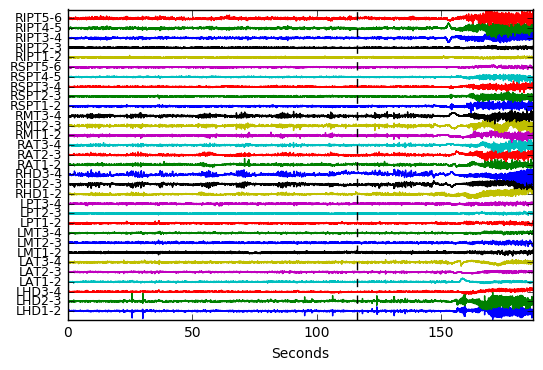

In [85]:
[h, ax]=ief.strat_plot(ieeg.T,chan_labels,tpts_sec=tpts_sec)
# ylim=h.ylim
# print(ylim)
ylim=ax.get_ylim()
plt.plot([40000, 40000],ylim,'k--')
plt.plot([onset_tpt/Sf, onset_tpt/Sf],ylim,'k--')

# print(ax.yaxis.limit_range_for_scale)

In [20]:
# mne.set_config('MNE_LOGGING_LEVEL', 'INFO', set_env=True)

Attempting to create new mne-python configuration file:
/Users/davidgroppe/.mne/mne-python.json


In [27]:
# from mne.time_frequency import istft
# istft?
# dpss_windows?

In [ ]:
# Plot Features Time Locked to Onset